In [278]:
# loading the required library
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score

Description of Variables

The dataset contains 6366 observations of 9 variables:

    rate_marriage: woman's rating of her marriage (1 = very poor, 5 = very good)
    age: woman's age
    yrs_married: number of years married
    children: number of children
    religious: woman's rating of how religious she is (1 = not religious, 4 = strongly religious)
    educ: level of education (9 = grade school, 12 = high school, 14 = some college, 16 = college graduate, 17 = some graduate school, 20 = advanced degree)
    occupation: woman's occupation (1 = student, 2 = farming/semi-skilled/unskilled, 3 = "white collar", 4 = teacher/nurse/writer/technician/skilled, 5 = managerial/business, 6 = professional with advanced degree)
    occupation_husb: husband's occupation (same coding as above)
    affairs: time spent in extra-marital affairs


In [279]:
# load dataset
df = sm.datasets.fair.load_pandas().data
df.shape



(6366, 9)

In [280]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [281]:
# add "affair" column: 1 represents having affairs, 0 represents not
df['target'] = (df.affairs > 0).astype(int)


In [282]:
df.shape

(6366, 10)

In [283]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,target
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1


In [284]:
df.columns

Index(['rate_marriage', 'age', 'yrs_married', 'children', 'religious', 'educ',
       'occupation', 'occupation_husb', 'affairs', 'target'],
      dtype='object')

In [285]:
df.groupby('target').mean()#affairs: time spent in extra-marital affairs

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
target,,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243


We can see that on average, women who had affairs they spend less time  for extra-marital affairs. which is to be expected. 

In [225]:
df["rate_marriage"].value_counts()#rate_marriage: woman's rating of her marriage (1 = very poor, 5 = very good).

5.0    2684
4.0    2242
3.0     993
2.0     348
1.0      99
Name: rate_marriage, dtype: int64

let's take anothor variable to extract the some information.

In [226]:
df.groupby("rate_marriage").mean()

,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,target
rate_marriage,,,,,,,,,
1.0,33.823232,13.914141,2.308081,2.343434,13.848485,3.232323,3.838384,1.201671,0.747475
2.0,30.471264,10.727011,1.735632,2.330460,13.864943,3.327586,3.764368,1.615745,0.635057
3.0,30.008056,10.239174,1.638469,2.308157,14.001007,3.402820,3.798590,1.371281,0.550856
4.0,28.856601,8.816905,1.369536,2.400981,14.144514,3.420161,3.835861,0.674837,0.322926
5.0,28.574702,8.311662,1.252794,2.506334,14.399776,3.454918,3.892697,0.348174,0.181446



An increase in age, yrs_married, and children appears to correlate with a declining marriage rating.
1.The probability of having extra marital status was very high where as the rating given by women is very low.  



In [227]:
df.groupby("religious").mean()# woman's rating of how religious she is (1 = not religious, 4 = strongly religious)

,rate_marriage,age,yrs_married,children,educ,occupation,occupation_husb,affairs,target
religious,,,,,,,,,
1.0,4.077375,27.704212,7.439765,1.041626,14.441724,3.431929,3.902057,1.246989,0.399608
2.0,4.021173,28.618218,8.650640,1.334804,13.985002,3.369210,3.820026,0.767282,0.361270
3.0,4.141206,29.536953,9.436416,1.492981,14.175475,3.439306,3.828241,0.545039,0.291908
4.0,4.349085,31.157774,11.115854,1.809451,14.753049,3.545732,3.954268,0.240431,0.181402


we can say that religious is a big factor which impacts for building extra-marital affairs for women.

In [228]:
df.groupby("educ").mean() #level of education (9 = grade school, 12 = high school, 14 = some college, 16 = college graduate, 17 = some graduate school, 20 = advanced degree)

,rate_marriage,age,yrs_married,children,religious,occupation,occupation_husb,affairs,target
educ,,,,,,,,,
9.0,3.583333,31.729167,14.541667,2.437500,2.583333,2.833333,3.562500,0.569095,0.437500
12.0,4.042706,29.297265,10.236084,1.656910,2.398273,3.062860,3.548944,0.683993,0.346929
14.0,4.075538,28.834431,8.911946,1.402284,2.425999,3.339043,3.879227,0.823679,0.354853
16.0,4.258729,27.995524,6.888988,1.013876,2.411817,3.809311,4.051030,0.558554,0.244405
17.0,4.194118,29.492157,7.990196,1.117647,2.462745,3.935294,4.141176,0.711906,0.274510
20.0,4.209091,32.106061,9.883333,1.293939,2.572727,4.284848,4.463636,0.530783,0.266667


 We found that several no of women have their affairs from grade school. More over i can say that women started their affection from tin ages of life.

In [229]:
df.groupby("occupation").mean()# woman's occupation (1 = student, 2 = farming/semi-skilled/unskilled, 3 = "white collar", 4 = teacher/nurse/writer/technician/skilled, 5 = managerial/business, 6 = professional with advanced degree)

,rate_marriage,age,yrs_married,children,religious,educ,occupation_husb,affairs,target
occupation,,,,,,,,,
1.0,4.317073,25.451220,5.743902,0.939024,2.292683,14.975610,3.463415,0.426014,0.170732
2.0,4.061700,28.489523,9.095460,1.691502,2.396973,13.009313,3.344587,0.719556,0.293364
3.0,4.051743,28.567194,8.833812,1.293927,2.391304,13.380525,3.768954,0.755248,0.346748
4.0,4.213740,29.523991,8.702563,1.389586,2.486914,15.844602,4.023991,0.555920,0.261723
5.0,4.104054,30.584459,10.551351,1.528378,2.436486,14.077027,4.163514,0.815209,0.417568
6.0,4.174312,30.674312,8.738532,1.105505,2.504587,17.954128,5.000000,1.194300,0.366972


More over highily enreaching people like bussiness person  or mangerial people had their relationship or affirs.
I can say that the probability of having extramarital affairs is high where as the occupation of the womens  were belongs from managerial/business.

In [230]:
df.groupby("occupation_husb").mean()#occupation_husb: husband's occupation (same coding as above)

,rate_marriage,age,yrs_married,children,religious,educ,occupation,affairs,target
occupation_husb,,,,,,,,,
1.0,4.318777,23.862445,3.449782,0.353712,2.327511,14.991266,3.445415,0.657557,0.209607
2.0,4.035933,28.310398,8.530581,1.400229,2.443425,13.521407,3.130734,0.763874,0.325688
3.0,4.034694,29.358163,9.212245,1.369388,2.451020,13.812245,3.244898,0.809943,0.353061
4.0,4.114286,28.592611,8.678325,1.380049,2.415271,14.109852,3.393596,0.717594,0.314778
5.0,4.114671,30.243114,10.090219,1.521079,2.426082,14.358628,3.577853,0.615542,0.338392
6.0,4.235849,30.973585,10.046226,1.512264,2.445283,15.822642,3.905660,0.739709,0.311321


I can say that  where as the occupation of the husband is white collar.probability of having extramarital affairs is high.

We add an intercept column as well as dummy variables for occupation and occupation_husb, since we are treating them as categorial variables. The dmatrices function from the patsy module can do that using formula language.

In [231]:
# create dataframes with an intercept column and dummy variables for
# occupation and occupation_husb
y, X = dmatrices('target ~ rate_marriage + age + yrs_married + children + \
                  religious + educ + C(occupation) + C(occupation_husb)',
                  df, return_type="dataframe")
# print X.columns

# rename column names for the dummy variables for better looks:
X = X.rename(columns = {'C(occupation)[T.2.0]':'occ_2',
                        'C(occupation)[T.3.0]':'occ_3',
                        'C(occupation)[T.4.0]':'occ_4',
                        'C(occupation)[T.5.0]':'occ_5',
                        'C(occupation)[T.6.0]':'occ_6',
                        'C(occupation_husb)[T.2.0]':'occ_husb_2',
                        'C(occupation_husb)[T.3.0]':'occ_husb_3',
                        'C(occupation_husb)[T.4.0]':'occ_husb_4',
                        'C(occupation_husb)[T.5.0]':'occ_husb_5',
                        'C(occupation_husb)[T.6.0]':'occ_husb_6'})

# and flatten y into a 1-D array so that scikit-learn will properly understand it as the response variable.
y = np.ravel(y)

In [232]:
os = RandomOverSampler(ratio=0.8)
xres,yres = os.fit_sample(X,y)
xres
yres

array([1., 1., 1., ..., 1., 1., 1.])

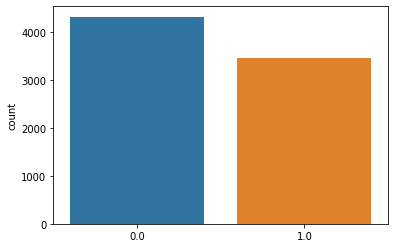

In [233]:
#countplot after balancing data.
tar_yres = sns.countplot(yres)


As target column is in inbalanced satuation . In ordered to increse  the accuracy of the model the target column sholud be in balance.

In [234]:
df.columns

Index(['rate_marriage', 'age', 'yrs_married', 'children', 'religious', 'educ',
       'occupation', 'occupation_husb', 'affairs', 'target'],
      dtype='object')

In [235]:
# checking misssing values for each attributes.
df.isnull().mean()



rate_marriage      0.0
age                0.0
yrs_married        0.0
children           0.0
religious          0.0
educ               0.0
occupation         0.0
occupation_husb    0.0
affairs            0.0
target             0.0
dtype: float64

Missing values are not present in each features of dataset.

# Let's Visualization the features

Text(0, 0.5, 'Frequency')

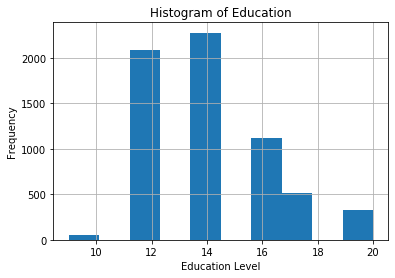

In [236]:
#importing inline library
%matplotlib inline

# histogram of education
df.educ.hist()
plt.title('Histogram of Education')
plt.xlabel('Education Level')
plt.ylabel('Frequency')
#level of education (9 = grade school, 12 = high school, 14 = some college, 16 = college graduate, 17 = some graduate school, 20 = advanced degree)

Text(0, 0.5, 'Frequency')

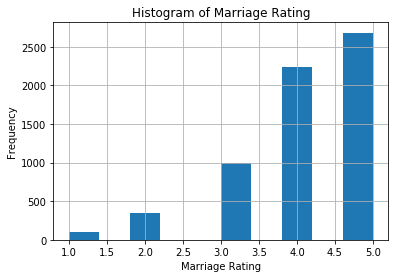

In [237]:
# histogram of marriage rating
df.rate_marriage.hist()
plt.title('Histogram of Marriage Rating')
plt.xlabel('Marriage Rating')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

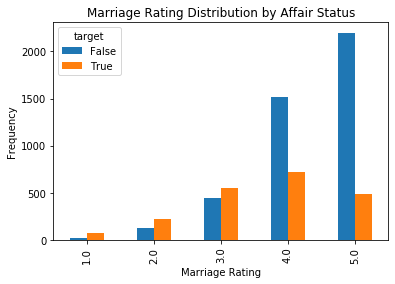

In [238]:
# Barplot of marriage rating grouped by affair (True or False)
pd.crosstab(df.rate_marriage, df.target.astype(bool)).plot(kind='bar')
plt.title('Marriage Rating Distribution by Affair Status')
plt.xlabel('Marriage Rating')
plt.ylabel('Frequency')
#woman's rating of her marriage (1 = very poor, 5 = very good)

Text(0, 0.5, 'Percentage')

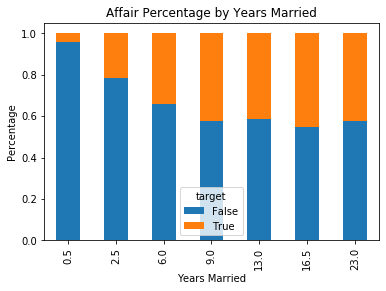

In [239]:
affair_yrs_married = pd.crosstab(df.yrs_married, df.target.astype(bool))
affair_yrs_married.div(affair_yrs_married.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Affair Percentage by Years Married')
plt.xlabel('Years Married')
plt.ylabel('Percentage')

# Processing for Applying the Logistic Regression model.

In [240]:
y, X = dmatrices('target ~ rate_marriage + age + yrs_married + children + \
                  religious + educ + C(occupation) + C(occupation_husb)',
                  df, return_type="dataframe")

# rename column names for the dummy variables for better looks:
X = X.rename(columns = {'C(occupation)[T.2.0]':'occ_2',
                        'C(occupation)[T.3.0]':'occ_3',
                        'C(occupation)[T.4.0]':'occ_4',
                        'C(occupation)[T.5.0]':'occ_5',
                        'C(occupation)[T.6.0]':'occ_6',
                        'C(occupation_husb)[T.2.0]':'occ_husb_2',
                        'C(occupation_husb)[T.3.0]':'occ_husb_3',
                        'C(occupation_husb)[T.4.0]':'occ_husb_4',
                        'C(occupation_husb)[T.5.0]':'occ_husb_5',
                        'C(occupation_husb)[T.6.0]':'occ_husb_6'})

# Applying flatten y into a 1-D array so that scikit-learn will properly understand it as the response variable.
y = np.ravel(y)

In [241]:
X.head()

,Intercept,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,yrs_married,children,religious,educ
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,16.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,16.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0


In [242]:
y

array([1., 1., 1., ..., 0., 0., 0.])

In [243]:
# what percentage had affairs?
y.mean()

0.3224945020420987

In [265]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline 


 I can say that only 32% of the women had affairs, which shows that we could obtain 68% accuracy by always predicting no.
 

In [245]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [246]:

# Create param grid.

param_grid = [
    {'classifier' : [LogisticRegression()],
     'classifier__penalty' : ['l1', 'l2'],
    'classifier__C' : np.logspace(-4, 4, 20),
    'classifier__solver' : ['liblinear']},
]

# Create grid search object

clf = GridSearchCV(pipe, param_grid = param_grid, cv = 2, verbose=True, n_jobs=-1)

# Fit on data

best_clf = clf.fit(X_train, y_train)

Fitting 2 folds for each of 40 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   58.2s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:   59.6s finished


In [247]:
best_clf

GridSearchCV(cv=2, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('classifier',
                                        RandomForestClassifier(bootstrap=True,
                                                               class_weight=None,
                                                               criterion='gini',
                                                               max_depth=None,
                                                               max_features='auto',
                                                               max_leaf_nodes=None,
                                                               min_impurity_decrease=0.0,
                                                               min_impurity_split=None,
                                                               min_samples_leaf=1,
                                                               min_samples_split=2,
               

In [248]:
# Results from Grid Search
print("\n The best estimator across ALL searched params:\n",
         clf.best_params_)
    
print("\n The best score across ALL searched params:\n",
          clf.best_score_)
    
print("\n The best parameters across ALL searched params:\n",
          clf.best_params_)


 The best estimator across ALL searched params:
 {'classifier': LogisticRegression(C=3792.690190732246, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False), 'classifier__C': 3792.690190732246, 'classifier__penalty': 'l2', 'classifier__solver': 'liblinear'}

 The best score across ALL searched params:
 0.7199281867145422

 The best parameters across ALL searched params:
 {'classifier': LogisticRegression(C=3792.690190732246, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False), 'classifier__C

In [249]:
pr=clf.predict(X_test)
pr
prb=clf.predict_proba(X_test)
# Training pred

In [250]:
model2 = LogisticRegression()# With out grid serch cv
model2.fit(X_train, y_train)

# predict class labels for the test set
predicted = model2.predict(X_test)
print(predicted)

# generate class probabilities
probs = model2.predict_proba(X_test)
print(probs)

[1. 0. 0. ... 0. 0. 0.]
[[0.3514634  0.6485366 ]
 [0.90955084 0.09044916]
 [0.72567333 0.27432667]
 ...
 [0.55727385 0.44272615]
 [0.81207043 0.18792957]
 [0.74734601 0.25265399]]


C:\Users\welcome\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


We see that the classifier is predicting a 1 (having an affair) any time the probability in the second column is greater than 0.5.

In [251]:
from sklearn import metrics


In [252]:
print(metrics.accuracy_score(y_test, predicted))
print(metrics.roc_auc_score(y_test, probs[:, 1]))

0.7298429319371728
0.745950606950631


In [253]:
# we can also see the confusion matrix and a classification report with other metrics.
print(metrics.confusion_matrix(y_test, predicted))
print(metrics.classification_report(y_test, predicted))

[[1169  134]
 [ 382  225]]
              precision    recall  f1-score   support

         0.0       0.75      0.90      0.82      1303
         1.0       0.63      0.37      0.47       607

    accuracy                           0.73      1910
   macro avg       0.69      0.63      0.64      1910
weighted avg       0.71      0.73      0.71      1910



In [254]:
# evaluate the model using 5-fold cross-validation
scores = cross_val_score(LogisticRegression(), X, y, scoring='accuracy', cv=5)
scores
print(scores.mean())

C:\Users\welcome\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\welcome\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\welcome\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7249513738732067


C:\Users\welcome\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\welcome\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# Predicting the Probability of an Womens Affair.

 Let's predict the probability of an affair for a random woman not present in the dataset. She's a 25-year-old teacher who graduated college, has been married for 3 years, has 1 child, rates herself as strongly religious, rates her marriage as fair, and her husband is a farmer.

In [255]:
test_sample = np.array([1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 3, 25, 3, 1, 4, 16]).reshape(1, -1)
model2.predict_proba(test_sample)

array([[0.77301478, 0.22698522]])

The predicted probability of an affair is 22%.
Here my model is not giving good accuracy. which indicates that my model leads to overfitting .
so we have to apply different techinique for incresing the model accuracy.

In [256]:
#feature selection


In [277]:
df.columns

Index(['Intercept', 'occ_2', 'occ_3', 'occ_4', 'occ_5', 'occ_6', 'occ_husb_2',
       'occ_husb_3', 'occ_husb_4', 'occ_husb_5', 'occ_husb_6', 'rate_marriage',
       'age', 'yrs_married', 'children', 'religious', 'educ'],
      dtype='object')

In [273]:

df=pd.DataFrame(X,y)
df.head()

,Intercept,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,yrs_married,children,religious,educ
1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0
1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0
1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0
1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0
1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0


In [258]:
df.isnull().sum()

Intercept        0
occ_2            0
occ_3            0
occ_4            0
occ_5            0
occ_6            0
occ_husb_2       0
occ_husb_3       0
occ_husb_4       0
occ_husb_5       0
occ_husb_6       0
rate_marriage    0
age              0
yrs_married      0
children         0
religious        0
educ             0
dtype: int64

In [259]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

In [260]:
cols = list(X.columns)
model = LogisticRegression()
#Initializing RFE model
rfe = RFE(model, 10)             
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

C:\Users\welcome\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\welcome\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\welcome\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\welcome\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Index(['Intercept', 'occ_5', 'occ_6', 'occ_husb_2', 'occ_husb_3', 'occ_husb_4',
       'occ_husb_5', 'occ_husb_6', 'rate_marriage', 'religious'],
      dtype='object')


C:\Users\welcome\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\welcome\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\welcome\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\welcome\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\welcome\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to

In [262]:
df=df.drop(['occ_2', 'occ_3', 'occ_4', 
       'age', 'yrs_married', 'children','educ'],axis=1)

In [287]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,target
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1


In [288]:
df.columns

Index(['rate_marriage', 'age', 'yrs_married', 'children', 'religious', 'educ',
       'occupation', 'occupation_husb', 'affairs', 'target'],
      dtype='object')

In [289]:
x=df.drop(["target"],axis=1)

In [290]:
y=df["target"]

In [291]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)


In [295]:
# Create param grid.

param_grid = [
    {'classifier' : [LogisticRegression()],
     'classifier__penalty' : ['l1', 'l2'],
    'classifier__C' : np.logspace(-4, 4, 20),
    'classifier__solver' : ['liblinear']},
]

# Create grid search object

clf1 = GridSearchCV(pipe, param_grid = param_grid, cv = 4, verbose=True, n_jobs=-1)

# Fit on data

best_clf = clf1.fit(X_train, y_train)

Fitting 4 folds for each of 40 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 147 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:  1.9min finished


In [298]:
# Results from Grid Search
print("\n The best estimator across ALL searched params:\n",
         clf.best_params_)
    
print("\n The best score across ALL searched params:\n",
          clf.best_score_)
    
print("\n The best parameters across ALL searched params:\n",
          clf.best_params_)


 The best estimator across ALL searched params:
 {'classifier': LogisticRegression(C=545.5594781168514, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False), 'classifier__C': 545.5594781168514, 'classifier__penalty': 'l2', 'classifier__solver': 'liblinear'}

 The best score across ALL searched params:
 1.0

 The best parameters across ALL searched params:
 {'classifier': LogisticRegression(C=545.5594781168514, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False), 'classifier__C': 545.55947811

In [303]:
pr=clf1.predict(X_test)
pr
prb=clf1.predict_proba(X_test)
prb


array([[9.98710549e-01, 1.28945097e-03],
       [9.99841495e-01, 1.58505048e-04],
       [9.99629236e-01, 3.70763547e-04],
       ...,
       [9.99505049e-01, 4.94950929e-04],
       [9.99875653e-01, 1.24347066e-04],
       [0.00000000e+00, 1.00000000e+00]])

In [304]:
model1 = LogisticRegression()# With out grid serch cv
model1.fit(X_train, y_train)

# predict class labels for the test set
predicted = model1.predict(X_test)
print(predicted)

# generate class probabilities
probs = model1.predict_proba(X_test)
print(probs)

[0 0 0 ... 0 0 1]
[[9.10538107e-01 8.94618931e-02]
 [9.90446684e-01 9.55331595e-03]
 [9.71181293e-01 2.88187066e-02]
 ...
 [9.53529759e-01 4.64702410e-02]
 [9.83989578e-01 1.60104220e-02]
 [2.53796983e-13 1.00000000e+00]]


C:\Users\welcome\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [305]:
print(metrics.accuracy_score(y_test, predicted))
print(metrics.roc_auc_score(y_test, probs[:, 1]))

0.9785340314136126
0.9988494426118412


In [308]:
# we can also see the confusion matrix and a classification report with other metrics.
print(metrics.confusion_matrix(y_test, predicted))
print(metrics.classification_report(y_test, predicted))

[[1303    0]
 [  41  566]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1303
           1       1.00      0.93      0.97       607

    accuracy                           0.98      1910
   macro avg       0.98      0.97      0.97      1910
weighted avg       0.98      0.98      0.98      1910



In [309]:
# evaluate the model using 5-fold cross-validation
scores = cross_val_score(LogisticRegression(), x, y, scoring='accuracy', cv=5)
scores
print(scores.mean())

0.9773807055478214


C:\Users\welcome\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\welcome\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\welcome\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\welcome\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\welcome\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to

In [310]:
#End